<a href="https://colab.research.google.com/github/TranThiDieuHien/Cac-thuat-toan-toi-uu/blob/main/Bai_tap_Linear_Regression_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mô Tả Bài Toán



### Dữ liệu chứa các cột sau: <br>


<li> 'TV' </li>
<li> 'Radio'  </li>
<li> 'Newspaper' </li>
<li> 'Sales'  </li>

### Khai báo thư viện

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Đọc file data.csv

In [7]:
Advertising = pd.read_csv("Advertising.csv")
Advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
Advertising.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Training a Linear Regression Model

Bắt đầu đào tạo một mô hình hồi quy. Đầu tiên, ta sẽ chia dữ liệu Data thành một mảng X chứa các yếu tố cần training và một mảng y có chứa biến mục tiêu cần hướng tới. Trong trường hợp này là cột Sales.


In [10]:
X = Advertising[['TV', 'Radio', 'Newspaper']]
y = Advertising['Sales']

#### Chia dữ liệu thành tập train và tập test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


## Khởi tạo Model Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
predictions = lm.predict(X_test)

In [17]:
predictions

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

### Kiểm tra độ chính xác của mô hình dự đoán so với thực tế

In [18]:
lm.score(X_test,y_test)

0.899438024100912

Ta có thể thấy rằng độ chính xác của mô hình trên là 89,94%. Mô hình có độ chính xác cao.

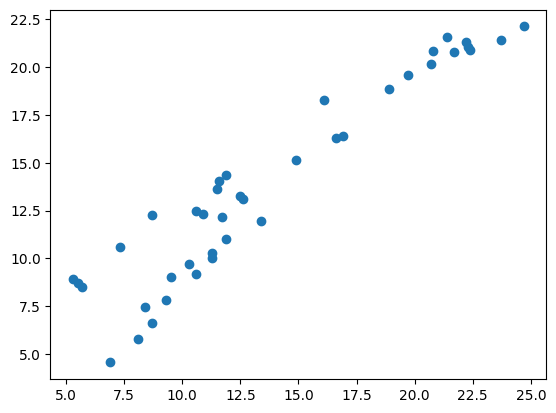

In [19]:
plt.scatter(y_test,predictions)

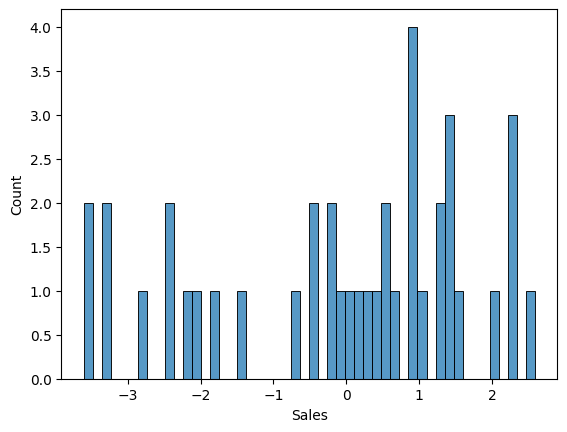

In [20]:
sns.histplot((y_test-predictions),bins=50);

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.4607567168117603
MSE: 3.1740973539761033
RMSE: 1.78159966153345
